##Huawei Social Network Data

URL:https://www.kaggle.com/datasets/andrewlucci/huawei-social-network-data

Data set conists of "Huawei" customer data. Each customer is considered as a node and connection between those customers is displayed by edges.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import random
import matplotlib.pyplot as plt

Modules were imported

In [2]:
df = pd.read_excel('Facebook_Data2.xlsx', index_col=0)
G = nx.from_pandas_adjacency(df)
original_labels = nx.get_node_attributes(G, 'original_label')
nx.set_node_attributes(G, name='original_label', values={i: label for i, label in enumerate(df.index, start=1)})
G = nx.relabel_nodes(G, {node: i for i, node in enumerate(G.nodes(), start=1)})




Reading dataset and relabeling it for simpler work with network. Original labels could be assesed if needed.

average_degree is 100.306
density is  0.10040640640640641
average_clustering is  0.100329588445239
Connected Component 1: Size = 1000


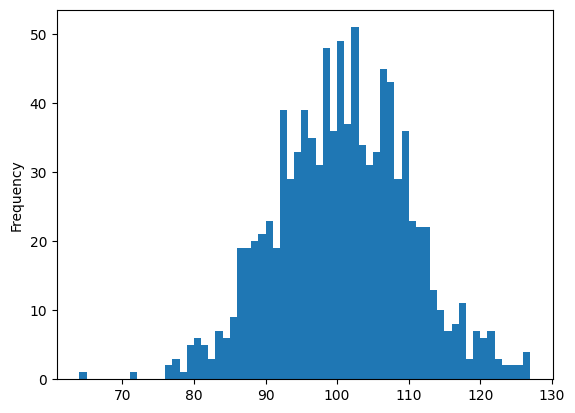

In [3]:
#average degree
average_degree_real = sum(dict(G.degree()).values()) / len(G)
print("average_degree is",average_degree_real)

#density
density = nx.density(G)
print("density is ",density)

#degree distribution
degrees_real= dict(G.degree())
most_connected_nodes_real = sorted(degrees_real, key=degrees_real.get, reverse=True)
plt.hist(degrees_real.values(), bins=range(min(degrees_real.values()), max(degrees_real.values()) + 1))
plt.ylabel('Frequency')


#clustering
clustering_real = nx.average_clustering(G)
print("average_clustering is ",clustering_real)

connected_components = list(nx.connected_components(G))

#Connected components
connected_components = list(nx.connected_components(G))
for i, component in enumerate(connected_components, start=1):
    print(f"Connected Component {i}: Size = {len(component)}")


Searching for attributes of a network. Such as: clustering, centrality, density, connected components, and visualizing degree distribution(It is broad). This parameters will be later used to create Augmented networks

#Centralities

Centralities are used to find most important nodes inside network

In [7]:
top_nodes_eigenvector = []
eigenvector_real = nx.eigenvector_centrality(G)
sorted_centrality_real = sorted(eigenvector_real.items(), key=lambda x: x[1], reverse=True)
for node, _ in sorted_centrality_real[:7]:
    top_nodes_eigenvector.append(node)


In [8]:
#PageRank
top_nodes_pagerank = []
pagerank_real = nx.pagerank(G)
sorted_pagerank_real = sorted(pagerank_real.items(), key=lambda x: x[1], reverse=True)
for node, _ in sorted_pagerank_real[:7]:
    top_nodes_pagerank.append(node)

In [9]:
#Katz
top_nodes_katz = []
katz_real = nx.katz_centrality_numpy(G)
sorted_katz_real = sorted(katz_real.items(), key=lambda x: x[1], reverse=True)
for node, _ in sorted_katz_real[:7]:
    top_nodes_katz.append(node)

In [10]:
#Closeness
top_nodes_closeness = []
closeness_real = nx.closeness_centrality(G)
sorted_closeness_real = sorted(closeness_real .items(), key=lambda x: x[1], reverse=True)
for node, _ in sorted_closeness_real[:7]:
    top_nodes_closeness.append(node)

In [11]:
#Harmonic
top_nodes_harmonic = []
harmonic_real = nx.harmonic_centrality(G)
sorted_harmonic_real = sorted(harmonic_real .items(), key=lambda x: x[1], reverse=True)
for node, _ in sorted_harmonic_real[:7]:
    top_nodes_harmonic.append(node)

In [12]:
#Betweenness
top_nodes_betweenness = []
betweenness_real = nx.betweenness_centrality(G)
sorted_betweenness_real = sorted(betweenness_real .items(), key=lambda x: x[1], reverse=True)
for node, _ in sorted_betweenness_real[:7]:
    top_nodes_betweenness.append(node)

In this part I was searching for 7 most important nodes in a graph. I made it based on 6 centralities(Eigenvector,PageRank,Katz,Closeness,Harmonic,Betweenness).

##Node activators

In [13]:
random.seed(42)
for u, v in G.edges():
    G[u][v]['weight'] = random.uniform(0,0.015)
for node in G.nodes():
    G.nodes[node]['initial_threshold'] = random.random()

This part of code is assigning weight to each edge and to each node randomly. It could be adjusted if needed.In best case it should be based on real data

In [14]:
def activate_nodes(graph, start_nodes):
    activated_nodes = set(start_nodes)
    queue = list(start_nodes)

    while queue:
        current_node = queue.pop(0)

        for neighbor in graph.neighbors(current_node):
            total_weight = sum(graph[current_node][n]['weight'] for n in graph.neighbors(current_node) if n in activated_nodes)
            if neighbor not in activated_nodes and total_weight > graph.nodes[neighbor]['initial_threshold']:
                queue.append(neighbor)
                activated_nodes.add(neighbor)

    return activated_nodes

Function which takes some activated nodes as an input, and then based on weight of edge and threshhold of a node returns number of activated nodes. Number of nodes selected could be adjusted if needed

In [15]:
def add_labels(activated_nodes_counts):
    rects = plt.gca().patches
    for rec, count in zip(rects, activated_nodes_counts):
        h, w = rec.get_height(), rec.get_width()
        x, y = rec.get_x(), rec.get_y()
        plt.gca().text(x + w / 2, y + h, str(count), ha="center", va="bottom")

def remove_ticks():
    plt.tick_params(axis='x', bottom=False)
    plt.tick_params(axis='y', left=False)

def remove_frame():
    for spine in plt.gca().spines.values():
        spine.set_visible(False)

Here I define three funtions. Thez are used to make visualization easy to understand.
First function is used to add labels at the top of a bar.
Second is for removing ticks from x and y axis.
And third is removing frame.

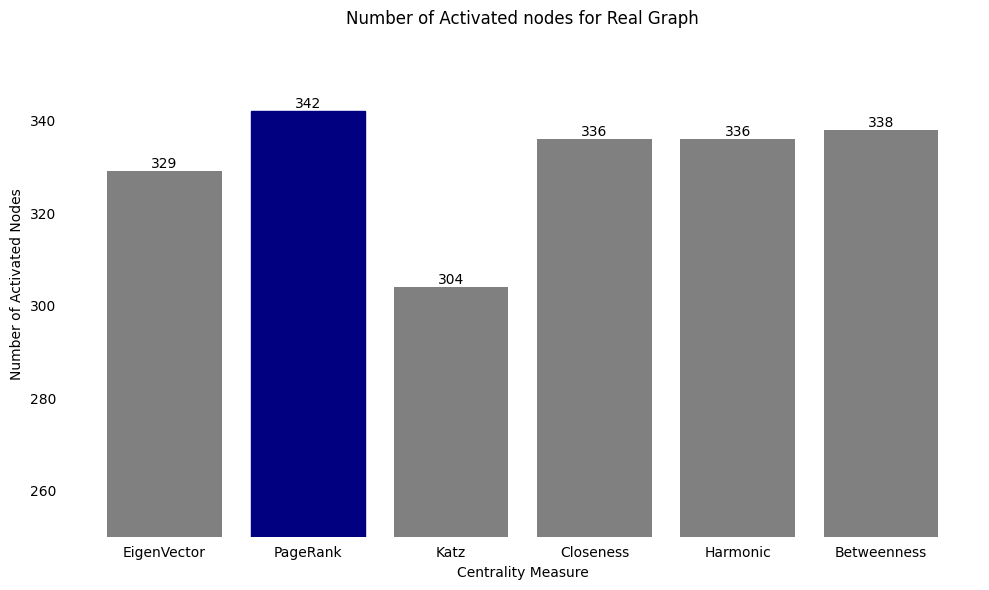

In [16]:
activated_nodes_counts = []
top_nodes_list = [top_nodes_eigenvector, top_nodes_pagerank, top_nodes_katz,
                  top_nodes_closeness, top_nodes_harmonic, top_nodes_betweenness]
for activating_nodes in top_nodes_list:
    activated_nodes = activate_nodes(G, activating_nodes)
    activated_nodes_counts.append(len(activated_nodes))

custom_x_labels = ['EigenVector', 'PageRank', 'Katz', 'Closeness', 'Harmonic', 'Betweenness']
plt.figure(figsize=(10, 6))
barlist = plt.bar(custom_x_labels, activated_nodes_counts, color='grey')
remove_ticks()
remove_frame()
add_labels(activated_nodes_counts)
barlist[1].set_color('navy')
plt.xlabel('Centrality Measure')
plt.ylabel('Number of Activated Nodes')
plt.title('Number of Activated nodes for Real Graph')
plt.ylim(250, plt.gca().get_ylim()[1])
plt.tight_layout()
plt.show()





The code is displaying a bar chart with number of activated nodes by choosing 7 most important from each centrality.

##ER GRAPHS

In [19]:
erdos_renyi_graph = nx.erdos_renyi_graph(n=1000,p=density)

First augmented graph(erdos_renyi_graph), to reflect real graph number of nodes is same as in real= 1000 and probability is density of a real graph.

average_degree is 100.174
density is  0.10027427427427428
average_clustering is  0.10052745771038966
Connected Component 1: Size = 1000


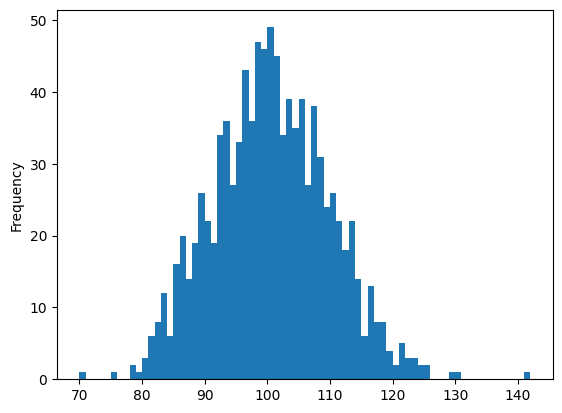

In [20]:
#average degree
average_degree = sum(dict(erdos_renyi_graph.degree()).values()) / len(erdos_renyi_graph)
print("average_degree is",average_degree)

#density
density_er = nx.density(erdos_renyi_graph)
print("density is ",density_er)

#degree distribution
degrees_er = dict(erdos_renyi_graph.degree())

plt.hist(degrees_er.values(), bins=range(min(degrees_er.values()), max(degrees_er.values()) + 1))
plt.ylabel('Frequency')


#clustering
clustering = nx.average_clustering(erdos_renyi_graph)
print("average_clustering is ",clustering)

#Connected components
connected_components = list(nx.connected_components(erdos_renyi_graph))
for i, component in enumerate(connected_components, start=1):
    print(f"Connected Component {i}: Size = {len(component)}")

Searching for attributes of a network. Such as: clustering, centrality, density, connected components, and visualizing degree distribution(It is Poissonian). This parameters will be later used to create Augmented networks

#Centralities

Centralities are used to find most important nodes inside network

In [21]:
#Eigenvector
top_nodes_eigenvector_er = []
centrality_er = nx.eigenvector_centrality(erdos_renyi_graph)
sorted_centrality_er = sorted(centrality_er.items(), key=lambda x: x[1], reverse=True)
for node, _ in sorted_centrality_er[:7]:
    top_nodes_eigenvector_er.append(node)

In [22]:
    #PageRank
top_nodes_pagerank_er = []
pagerank_er = nx.pagerank(erdos_renyi_graph)
sorted_pagerank_er = sorted(pagerank_er.items(), key=lambda x: x[1], reverse=True)
for node, _ in sorted_pagerank_er[:7]:
  top_nodes_pagerank_er.append(node)

In [23]:
    #Katz
top_nodes_katz_er = []
katz_er = nx.katz_centrality_numpy(erdos_renyi_graph)
sorted_katz_er = sorted(katz_er.items(), key=lambda x: x[1], reverse=True)
for node, _ in sorted_katz_er[:7]:
  top_nodes_katz_er.append(node)

In [24]:
    #Closeness
top_nodes_closeness_er = []
closeness_er = nx.closeness_centrality(erdos_renyi_graph)
sorted_closeness_er = sorted(closeness_er .items(), key=lambda x: x[1], reverse=True)
for node, _ in sorted_closeness_er[:7]:
  top_nodes_closeness_er.append(node)

In [25]:
    #Harmonic
top_nodes_harmonic_er = []
harmonic_er = nx.harmonic_centrality(erdos_renyi_graph)
sorted_harmonic_er = sorted(harmonic_er .items(), key=lambda x: x[1], reverse=True)
for node, _ in sorted_harmonic_er[:7]:
  top_nodes_harmonic_er.append(node)

In [26]:
#Betweenness
top_nodes_betweenness_er = []
betweenness_er = nx.betweenness_centrality(erdos_renyi_graph)
sorted_betweenness_er = sorted(betweenness_er.items(), key=lambda x: x[1], reverse=True)
for node, _ in sorted_betweenness_er[:7]:
  top_nodes_betweenness_er.append(node)


In this part I was searching for 7 most important nodes in a graph. I made it based on 6 centralities(Eigenvector,PageRank,Katz,Closeness,Harmonic,Betweenness).

##Node activators


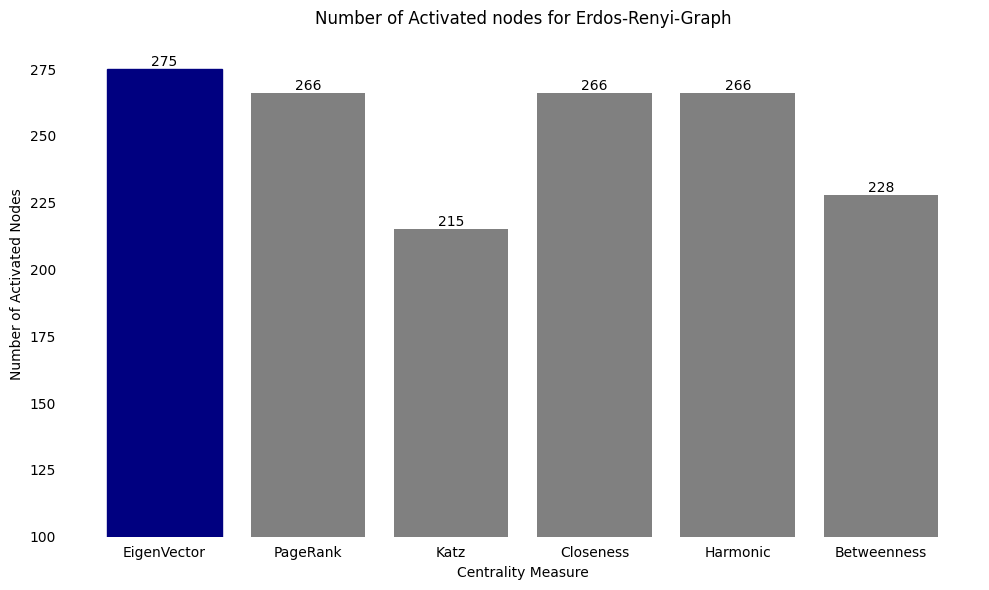

In [27]:
random.seed(42)
for x, y in erdos_renyi_graph.edges():
    erdos_renyi_graph[x][y]['weight'] = random.uniform(0,0.015)
for node in erdos_renyi_graph.nodes():
    erdos_renyi_graph.nodes[node]['initial_threshold'] = random.random()
for x, y in erdos_renyi_graph.edges():
    erdos_renyi_graph[x][y]['probability'] = random.random()

activated_nodes_counts = []
top_nodes_list_er = [top_nodes_eigenvector_er, top_nodes_pagerank_er, top_nodes_katz_er,
                  top_nodes_closeness_er, top_nodes_harmonic_er, top_nodes_betweenness_er]
for activating_nodes_er in top_nodes_list_er:
    activated_nodes = activate_nodes(erdos_renyi_graph, activating_nodes_er)
    activated_nodes_counts.append(len(activated_nodes))

custom_x_labels = ['EigenVector', 'PageRank', 'Katz', 'Closeness', 'Harmonic', 'Betweenness']
plt.figure(figsize=(10, 6))
barlist = plt.bar(custom_x_labels, activated_nodes_counts, color='grey')
remove_ticks()
remove_frame()
add_labels(activated_nodes_counts)
barlist[0].set_color('navy')
plt.xlabel('Centrality Measure')
plt.ylabel('Number of Activated Nodes')
plt.title('Number of Activated nodes for Erdos-Renyi-Graph')
plt.ylim(100, plt.gca().get_ylim()[1])
plt.tight_layout()
plt.show()



The code is displaying a bar chart with number of activated nodes by choosing 7 most important from each centrality.

##Watts & Strogatz Graph

In [58]:
watts_strogatz_graph = nx.watts_strogatz_graph(n=1000,k=100,p=0.1)

Second augmented graph(watts_strogatz_graph), to reflect real graph number of nodes is same as in real= 1000 k value is average degree of a real graph and p is average clustering

average_degree is 100.0
density is  0.1001001001001001
average_clustering is  0.5570307855679609
Connected Component 1: Size = 1000


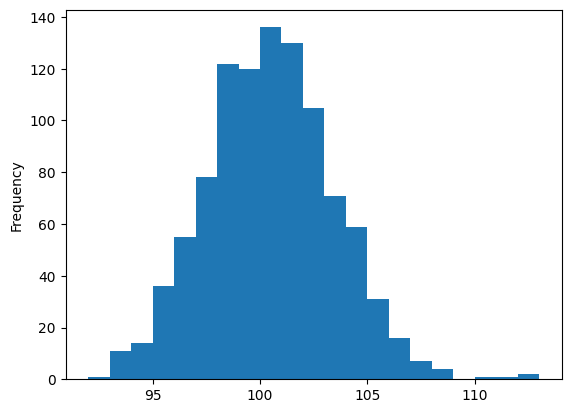

In [59]:
#average degree
average_degree = sum(dict(watts_strogatz_graph.degree()).values()) / len(watts_strogatz_graph)
print("average_degree is",average_degree)

#density
density_ws = nx.density(watts_strogatz_graph)
print("density is ",density_ws)

#degree distribution
degrees_ws = dict(watts_strogatz_graph.degree())
plt.hist(degrees_ws.values(), bins=range(min(degrees_ws.values()), max(degrees_ws.values()) + 1))
plt.ylabel('Frequency')


#clustering
clustering_ws = nx.average_clustering(watts_strogatz_graph)
print("average_clustering is ",clustering_ws)

#Connected components
connected_components = list(nx.connected_components(watts_strogatz_graph))
for i, component in enumerate(connected_components, start=1):
    print(f"Connected Component {i}: Size = {len(component)}")

Searching for attributes of a network. Such as: clustering, centrality, density, connected components, and visualizing degree distribution(It is Poissonian). This parameters will be later used to create Augmented networks

#Centrality

Centralities are used to find most important nodes inside network

In [62]:
#Eigenvector
top_nodes_eigenvector_ws = []
centrality_ws = nx.eigenvector_centrality(watts_strogatz_graph)
sorted_centrality_ws = sorted(centrality_ws.items(), key=lambda x: x[1], reverse=True)
for node, _ in sorted_centrality_ws[:7]:
    top_nodes_eigenvector_ws.append(node)

In [63]:
#PageRank
top_nodes_pagerank_ws = []
pagerank_ws = nx.pagerank(watts_strogatz_graph)
sorted_pagerank_ws = sorted(pagerank_ws.items(), key=lambda x: x[1], reverse=True)
for node, _ in sorted_pagerank_ws[:7]:
    top_nodes_pagerank_ws.append(node)

In [64]:
#Katz
top_nodes_katz_ws = []
katz_ws = nx.katz_centrality_numpy(watts_strogatz_graph)
sorted_katz_ws = sorted(katz_ws.items(), key=lambda x: x[1], reverse=True)
for node, _ in sorted_katz_ws[:7]:
    top_nodes_katz_ws.append(node)

In [65]:
#Closeness
top_nodes_closeness_ws = []
closeness_ws = nx.closeness_centrality(watts_strogatz_graph)
sorted_closeness_ws = sorted(closeness_ws.items(), key=lambda x: x[1], reverse=True)
for node, _ in sorted_closeness_ws[:7]:
    top_nodes_closeness_ws.append(node)

In [66]:
#Harmonic
top_nodes_harmonic_ws = []
harmonic_ws = nx.harmonic_centrality(watts_strogatz_graph)
sorted_harmonic_ws = sorted(harmonic_ws.items(), key=lambda x: x[1], reverse=True)
for node, _ in sorted_harmonic_ws[:7]:
    top_nodes_harmonic_ws.append(node)

In [67]:
#Betwenness
top_nodes_betweenness_ws = []
betweenness_ws = nx.betweenness_centrality(watts_strogatz_graph)
sorted_betweenness_ws = sorted(betweenness_ws.items(), key=lambda x: x[1], reverse=True)
for node, _ in sorted_betweenness_ws[:7]:
    top_nodes_betweenness_ws.append(node)

In this part I was searching for 7 most important nodes in a graph. I made it based on 6 centralities(Eigenvector,PageRank,Katz,Closeness,Harmonic,Betweenness).

##Node activators


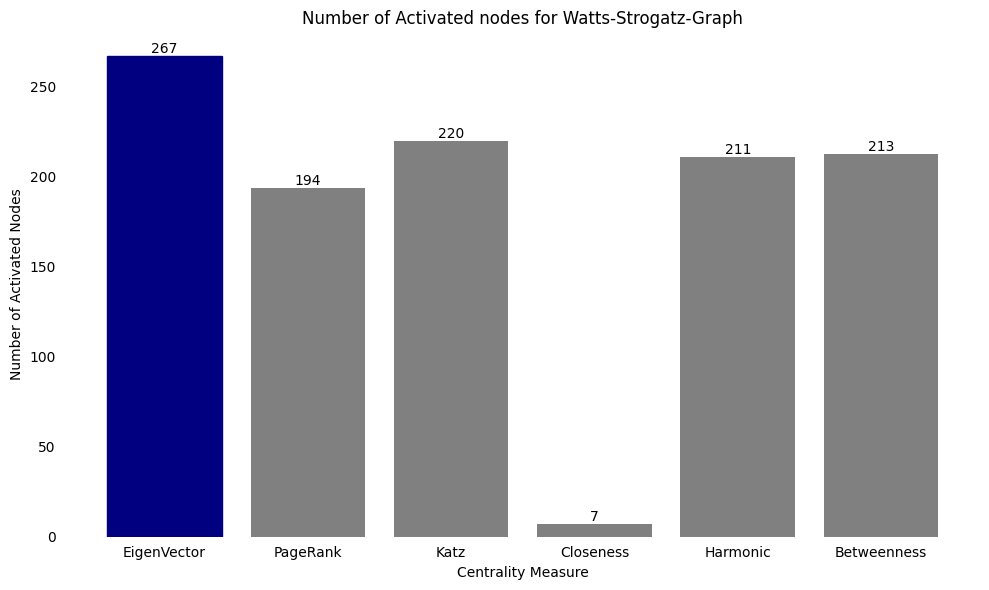

In [68]:
random.seed(42)
for a, b in watts_strogatz_graph.edges():
    watts_strogatz_graph[a][b]['weight'] = random.uniform(0,0.015)
for node in  watts_strogatz_graph.nodes():
    watts_strogatz_graph.nodes[node]['initial_threshold'] = random.random()
for a, b in  watts_strogatz_graph.edges():
    watts_strogatz_graph[a][b]['probability'] = random.random()

activated_nodes_counts = []
top_nodes_list_ws = [top_nodes_eigenvector_ws, top_nodes_pagerank_ws, top_nodes_katz_ws,
                  top_nodes_closeness_ws, top_nodes_harmonic_ws, top_nodes_betweenness_ws]
for activating_nodes_ws in top_nodes_list_ws:
    activated_nodes = activate_nodes(watts_strogatz_graph, activating_nodes_ws)
    activated_nodes_counts.append(len(activated_nodes))

custom_x_labels = ['EigenVector', 'PageRank', 'Katz', 'Closeness', 'Harmonic', 'Betweenness']
plt.figure(figsize=(10, 6))
barlist = plt.bar(custom_x_labels, activated_nodes_counts, color='grey')
remove_ticks()
remove_frame()
add_labels(activated_nodes_counts)
barlist[0].set_color('navy')
plt.xlabel('Centrality Measure')
plt.ylabel('Number of Activated Nodes')
plt.title('Number of Activated nodes for Watts-Strogatz-Graph')
plt.ylim(0, plt.gca().get_ylim()[1])
plt.tight_layout()
plt.show()

The code is displaying a bar chart with number of activated nodes by choosing 7 most important from each centrality.

##Barabasi-Albert Graph


In [38]:
barabasi_albert_graph  = nx.barabasi_albert_graph (n=1000 ,m=50)

Third augmented graph(barabasi_albert_graph), to reflect real graph number of nodes is same as in real= 1000 m value is set to reach average degree = 100

average_degree is 95.0
density is  0.09509509509509509
average_clustering is  0.17383463289182424
Connected Component 1: Size = 1000


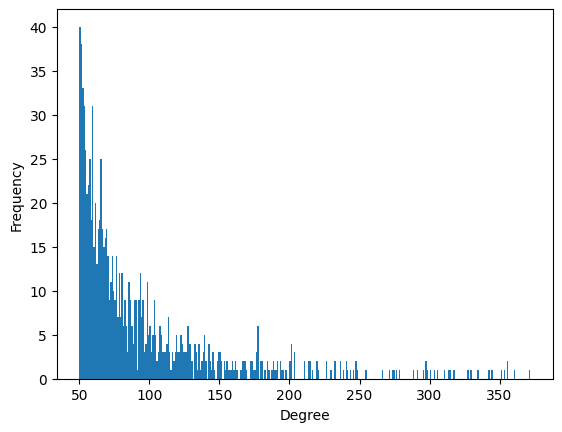

In [39]:
#average degree
average_degree = sum(dict(barabasi_albert_graph.degree()).values()) / len(barabasi_albert_graph)
print("average_degree is",average_degree)

#density
density_bar = nx.density(barabasi_albert_graph)
print("density is ",density_bar)

#degree distribution
degrees_bar = dict(barabasi_albert_graph.degree())
plt.hist(degrees_bar.values(), bins=range(min(degrees_bar.values()), max(degrees_bar.values()) + 1))
plt.ylabel('Frequency')
plt.xlabel('Degree')

#clustering
clustering = nx.average_clustering(barabasi_albert_graph)
print("average_clustering is ",clustering)

#Connected components
connected_components = list(nx.connected_components(barabasi_albert_graph))
for i, component in enumerate(connected_components, start=1):
    print(f"Connected Component {i}: Size = {len(component)}")

Searching for attributes of a network. Such as: clustering, centrality, density, connected components, and visualizing degree distribution(It is Pow er-Law). This parameters will be later used to create Augmented networks

#Centrality

Centralities are used to find most important nodes inside network

In [40]:
#Eigenvector
top_nodes_eigenvector_bar = []
centrality_bar = nx.eigenvector_centrality(barabasi_albert_graph)
sorted_centrality_bar = sorted(centrality_bar.items(), key=lambda x: x[1], reverse=True)
for node, _ in sorted_centrality_bar[:7]:
    top_nodes_eigenvector_bar.append(node)

In [41]:
#PageRank
top_nodes_pagerank_bar = []
pagerank_bar = nx.pagerank(barabasi_albert_graph)
sorted_pagerank_bar = sorted(pagerank_bar.items(), key=lambda x: x[1], reverse=True)
for node, _ in sorted_pagerank_bar[:7]:
    top_nodes_pagerank_bar.append(node)

In [42]:
#Katz
top_nodes_katz_bar = []
katz_bar = nx.katz_centrality_numpy(barabasi_albert_graph)
sorted_katz_bar = sorted(katz_bar.items(), key=lambda x: x[1], reverse=True)
for node, _ in sorted_katz_bar[:7]:
    top_nodes_katz_bar.append(node)

In [43]:
#Closeness
top_nodes_closeness_bar = []
closeness_bar = nx.closeness_centrality(barabasi_albert_graph)
sorted_closeness_bar = sorted(closeness_bar.items(), key=lambda x: x[1], reverse=True)
for node, _ in sorted_closeness_bar[:7]:
    top_nodes_closeness_bar.append(node)

In [44]:
    #Harmonic
top_nodes_harmonic_bar = []
harmonic_bar = nx.harmonic_centrality(barabasi_albert_graph)
sorted_harmonic_bar = sorted(harmonic_bar.items(), key=lambda x: x[1], reverse=True)
for node, _ in sorted_harmonic_bar[:7]:
  top_nodes_harmonic_bar.append(node)

In [45]:
    #Betweenness
top_nodes_betweenness_bar = []
betweenness_bar = nx.betweenness_centrality(barabasi_albert_graph)
sorted_betweenness_bar = sorted(betweenness_bar.items(), key=lambda x: x[1], reverse=True)
for node, _ in sorted_betweenness_bar[:7]:
  top_nodes_betweenness_bar.append(node)

In this part I was searching for 7 most important nodes in a graph. I made it based on 6 centralities(Eigenvector,PageRank,Katz,Closeness,Harmonic,Betweenness).

##Node activators

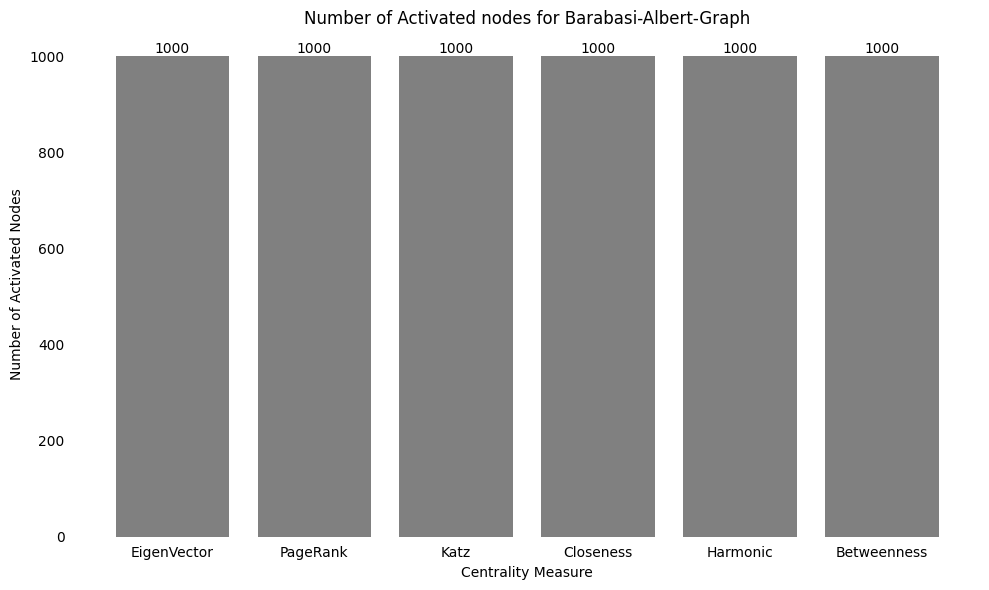

In [47]:
random.seed(42)
for k, m  in barabasi_albert_graph.edges():
    barabasi_albert_graph[k][m]['weight'] = random.uniform(0,0.015)
for node in barabasi_albert_graph.nodes():
    barabasi_albert_graph.nodes[node]['initial_threshold'] = random.random()
for k, m in barabasi_albert_graph.edges():
    barabasi_albert_graph[k][m]['probability'] = random.random()

activated_nodes_counts = []
top_nodes_list_bar = [top_nodes_eigenvector_bar, top_nodes_pagerank_bar, top_nodes_katz_bar,
                  top_nodes_closeness_bar, top_nodes_harmonic_bar, top_nodes_betweenness_bar]
for activating_nodes_bar in top_nodes_list_bar:
    activated_nodes = activate_nodes(barabasi_albert_graph, activating_nodes_bar)
    activated_nodes_counts.append(len(activated_nodes))

custom_x_labels = ['EigenVector', 'PageRank', 'Katz', 'Closeness', 'Harmonic', 'Betweenness']
plt.figure(figsize=(10, 6))
barlist = plt.bar(custom_x_labels, activated_nodes_counts, color='grey')
remove_ticks()
remove_frame()
add_labels(activated_nodes_counts)
plt.xlabel('Centrality Measure')
plt.ylabel('Number of Activated Nodes')
plt.title('Number of Activated nodes for Barabasi-Albert-Graph')
plt.ylim(0, plt.gca().get_ylim()[1])
plt.tight_layout()
plt.show()


The code is displaying a bar chart with number of activated nodes by choosing 7 most important from each centrality.

##SUMMARY

Text(0.5, 1.0, 'Watts & Strogatz Graph')

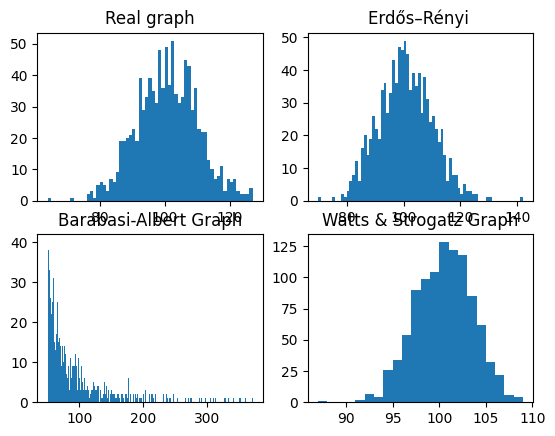

In [48]:
plt.subplot(221)
plt.hist(degrees_real.values(), bins=range(min(degrees_real.values()), max(degrees_real.values()) + 1))
plt.title("Real graph")
plt.subplot(222)
plt.hist(degrees_er.values(), bins=range(min(degrees_er.values()), max(degrees_er.values()) + 1))
plt.title("Erdős–Rényi ")
plt.subplot(223)
plt.hist(degrees_bar.values(), bins=range(min(degrees_bar.values()), max(degrees_bar.values()) + 1))
plt.title("Barabasi-Albert Graph")
plt.subplot(224)
plt.hist(degrees_ws.values(), bins=range(min(degrees_ws.values()), max(degrees_ws.values()) + 1))
plt.title("Watts & Strogatz Graph")

Degree distribution of all graphs

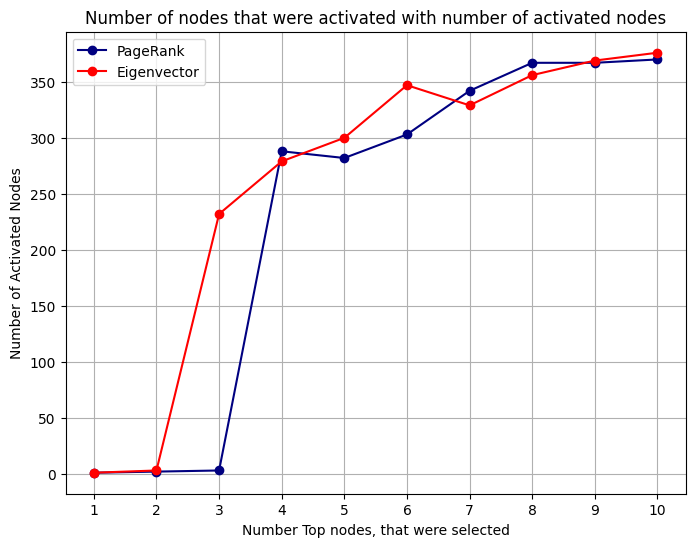

In [18]:
def count_activated_nodes(G, top_nodes):
    activated_nodes = activate_nodes(G, top_nodes)
    return len(activated_nodes)

selected_top_nodes = []
activated_nodes_pagerank = []
activated_nodes_eigenvector = []


for top_nodes in range(1, 11):
    top_nodes_pagerank_new = []
    top_nodes_eigenvector_new = []


    for node, _ in sorted_pagerank_real[:top_nodes]:
        top_nodes_pagerank_new.append(node)
    activated_count_pagerank = count_activated_nodes(G, top_nodes_pagerank_new)

    for node, _ in sorted_centrality_real[:top_nodes]:
        top_nodes_eigenvector_new.append(node)
    activated_count_eigenvector = count_activated_nodes(G, top_nodes_eigenvector_new)

    selected_top_nodes.append(top_nodes)
    activated_nodes_pagerank.append(activated_count_pagerank)
    activated_nodes_eigenvector.append(activated_count_eigenvector)


plt.figure(figsize=(8, 6))
plt.plot(selected_top_nodes, activated_nodes_pagerank, marker='o', linestyle='-', label='PageRank', color='navy')
plt.plot(selected_top_nodes, activated_nodes_eigenvector, marker='o', linestyle='-', label='Eigenvector', color='red')
plt.xlabel('Number Top nodes, that were selected')
plt.ylabel('Number of Activated Nodes')
plt.title('Number of nodes that were activated with number of activated nodes')
plt.legend()
plt.grid(True)
plt.xticks(selected_top_nodes)
plt.show()


How much nodes it is possible to activate by number of start nodes with page rank and eigenvector
